In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## 1. Define S(Q,t) function

In [137]:
def f_sqt_chain(Q, t, N=100, b=1.0, D=1.0, tau_R=1.0, p_max=10):
    """
    Compute the scattering function S(Q, t) for a Gaussian polymer chain.

    Parameters:
        Q (numpy.ndarray): Scattering vector magnitude (2D array)
        t (numpy.ndarray): Time (2D array)
        N (int): Number of beads in the polymer chain (default 100)
        b (float): Bond length (default 1.0)
        D (float): Diffusion coefficient (default 1.0)
        tau_R (float): Relaxation time (default 1.0)
        p_max (int): Number of terms in the summation for Phi_nm^1 (default 50)

    Returns:
        numpy.ndarray: Value of S(Q, t) (2D array)
    """

    # Indices for polymer beads
    n_values, m_values = np.meshgrid(np.arange(N), np.arange(N))
    abs_nm = np.abs(n_values - m_values)

    # Compute Phi_nm(t) components
    Phi_D = 6 * D * t  # Center-of-mass diffusion
    Phi_nm_0 = abs_nm * b**2  # Gaussian chain contribution

    # Compute Phi_nm^1 (dynamic part)
    Phi_nm_1 = (4 * N * b**2 / np.pi**2) * np.sum(
        [(1 / p**2) * np.einsum('kl,ij->ijkl', np.cos(p * np.pi * n_values / N)*np.cos(p * np.pi * m_values / N), (1 - np.exp(-t* p**2 / tau_R)))
         for p in range(1, p_max)], axis=0)
    
    # Total Phi_nm
    Phi_nm = Phi_D[:, :, None, None] + Phi_nm_0[None, None, :, :] + Phi_nm_1
    
    # Compute S(Q, t) using einsum
    # sqt = (1 / N) * (np.einsum('ij,ijkl->ij', (-Q**2/6), Phi_nm))
    Q_squared = Q**2  # Shape [i, j]
    Q_squared_expanded = Q_squared[:, :, None, None]  # Shape [i, j, 1, 1]
    sqt = (1 / N) * np.einsum('ijkl,ijkl->ij', np.exp(- (1/6) * Q_squared_expanded * Phi_nm), np.ones_like(Phi_nm))


    return sqt


## 2. Test visualize S(Q,t)

In [201]:
n_Q = 50
n_t = 50
Q = (np.arange(n_Q))/n_Q
t = (np.arange(n_t))/n_t*8

Rg = np.sqrt(100/6*1**2)
QRg = Q*Rg

Q_grid, t_grid = np.meshgrid(QRg, t)

sqt = f_sqt_chain(Q_grid, t_grid, N=100, b=1.0, D=1.0, tau_R=1.0, p_max=10)
sq0 = f_sqt_chain(Q_grid, np.zeros_like(t_grid), N=100, b=1.0, D=1.0, tau_R=1.0, p_max=10)

/tmp/ipykernel_1857982/3385581875.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([np.min(QRg), np.max(QRg)])
/tmp/ipykernel_1857982/3385581875.py:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([np.min(t), np.max(t)])


(0.8912509381337455, 7.84)

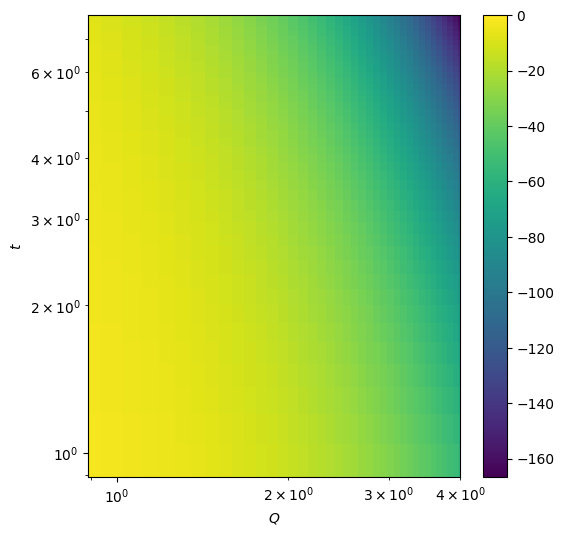

In [202]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
c = ax.pcolormesh(Q_grid, t_grid, np.log(sqt/sq0), cmap='viridis')
fig.colorbar(c, ax=ax)
ax.set_xlabel(r'$Q$')
ax.set_ylabel(r'$t$')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim([np.min(QRg), np.max(QRg)])
ax.set_ylim([np.min(t), np.max(t)])


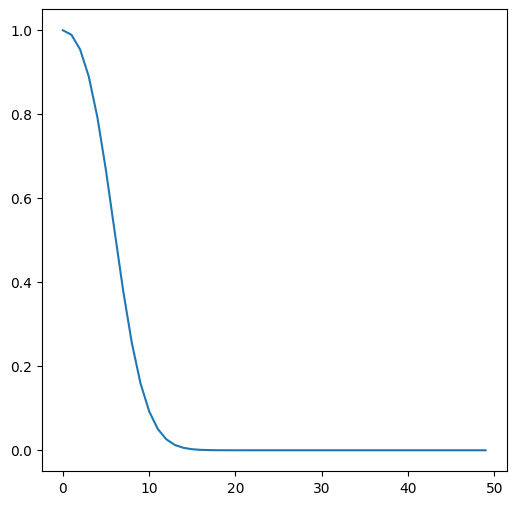

In [212]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot((sqt/sq0)[10,:])
# ax.set_xscale('log')
# ax.set_yscale('log')

In [209]:
(sqt/sq0)[10,:]

array([1.00000000e+00, 9.89126023e-01, 9.54267818e-01, 8.90216168e-01,
       7.93105213e-01, 6.65969016e-01, 5.21542514e-01, 3.78771024e-01,
       2.54913317e-01, 1.59385390e-01, 9.29471764e-02, 5.07484056e-02,
       2.60232558e-02, 1.25611487e-02, 5.71568380e-03, 2.45400060e-03,
       9.94687660e-04, 3.80762708e-04, 1.37685810e-04, 4.70430112e-05,
       1.51910129e-05, 4.63765785e-06, 1.33903095e-06, 3.65804401e-07,
       9.45991005e-08, 2.31709316e-08, 5.37871977e-09, 1.18405119e-09,
       2.47346013e-10, 4.90647544e-11, 9.24788592e-12, 1.65722253e-12,
       2.82495218e-13, 4.58267806e-14, 7.07692192e-15, 1.04057658e-15,
       1.45695021e-16, 1.94242664e-17, 2.46558437e-18, 2.97908197e-19,
       3.42546440e-20, 3.74715967e-21, 3.89847388e-22, 3.85620788e-23,
       3.62550540e-24, 3.23889617e-25, 2.74875084e-26, 2.21557131e-27,
       1.69575444e-28, 1.23223659e-29])